CELL 1: IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


CELL 2: LOAD DATASET

In [2]:
df = pd.read_csv("../data/churn_data.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


CELL 3: BASIC DATA UNDERSTANDING

In [3]:
df.shape


(7043, 21)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


CELL 4: TARGET VARIABLE CHECK

In [6]:
df['Churn'].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

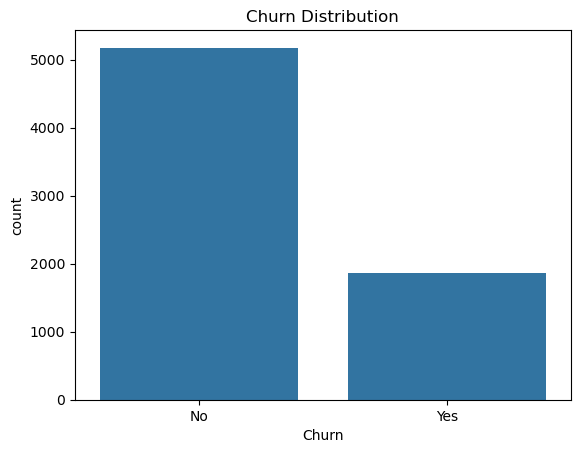

In [7]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


CELL 5: DATA CLEANING

In [8]:
df.drop('customerID', axis=1, inplace=True)


In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [10]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())


In [11]:
df.isnull().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

CELL 6: EXPLORATORY DATA ANALYSIS (EDA)

Churn vs Tenure

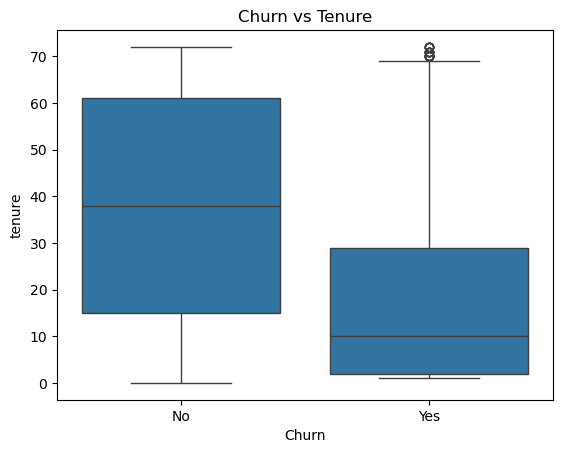

In [12]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Churn vs Tenure")
plt.show()


Churn vs Monthly Charges

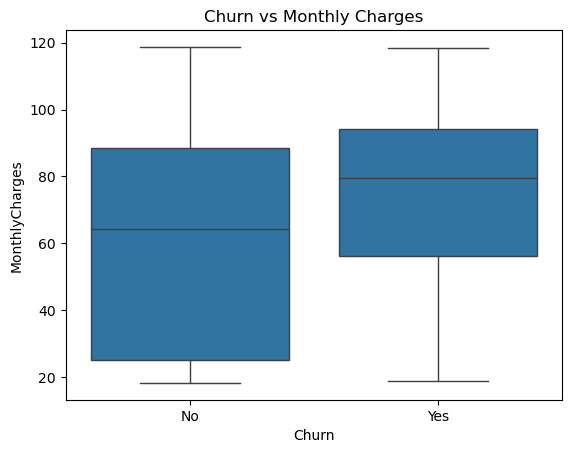

In [13]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Churn vs Monthly Charges")
plt.show()


Churn vs Contract Type

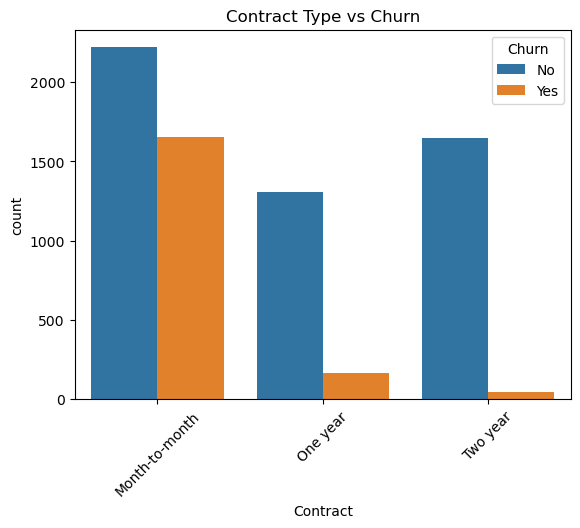

In [14]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Contract Type vs Churn")
plt.xticks(rotation=45)
plt.show()


CELL 7: ENCODE CATEGORICAL VARIABLES

In [15]:
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])


CELL 8: FEATURE & TARGET SPLIT

In [16]:
X = df.drop('Churn', axis=1)
y = df['Churn']


CELL 9: TRAIN–TEST SPLIT

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


CELL 10: FEATURE SCALING

In [18]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


CELL 11: TRAIN MACHINE LEARNING MODEL

In [19]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

CELL 12: MODEL EVALUATION

In [20]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8161816891412349

Confusion Matrix:
 [[933 103]
 [156 217]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



CELL 13: CHURN PREDICTION (NO WARNINGS)

In [21]:
# Take one customer as DataFrame (keeps feature names)
sample_customer = X.iloc[[0]]

# Scale input
sample_customer_scaled = scaler.transform(sample_customer)

# Predict
prediction = model.predict(sample_customer_scaled)

if prediction[0] == 1:
    print("⚠️ Customer is likely to CHURN")
else:
    print("✅ Customer is NOT likely to churn")


⚠️ Customer is likely to CHURN


CELL 14: SAVE MODEL (OPTIONAL BUT IMPRESSIVE)

In [22]:
import pickle

pickle.dump(model, open("churn_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
